# Data Understanding

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "wind_speed" - wind speed in km/h
- "weather_code" - category of the weather
- "is_holiday" - boolean field - 1 holiday / 0 non holiday
- "is_weekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('london_merged.csv')
df.head(25)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
df['weather_code'].unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [8]:
df['season'].unique()

array([3., 0., 1., 2.])

In [9]:
# cleaning weather code column
df['weather_code'] = df['weather_code'].replace({1 : 'Clear', 2 : 'Scattered clouds', 3: 'Broken clouds', 4: 'Cloudy', 7: 'Light Rain shower', 10: 'Rain with thunderstorm', 26: 'Snowfall'})

In [10]:
# cleaning seaason column
df['season'] = df['season'].replace({1: 'Summer', 2: 'Fall', 3: 'Winter', 0: 'Spring'})

In [11]:
# Convert the 'datetime_col' to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date into a new 'date_col'
df['date'] = df['timestamp'].dt.date

# Extract time into a new 'time_col'
df['time'] = df['timestamp'].dt.time

df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,Winter,2015-01-04,00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter,2015-01-04,01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter,2015-01-04,02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,Winter,2015-01-04,03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,Winter,2015-01-04,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken clouds,0.0,0.0,Winter,2017-01-03,19:00:00
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,0.0,0.0,Winter,2017-01-03,20:00:00
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,0.0,0.0,Winter,2017-01-03,21:00:00
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,Cloudy,0.0,0.0,Winter,2017-01-03,22:00:00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  object        
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  object        
 10  date          17414 non-null  datetime64[ns]
 11  time          17414 non-null  object        
 12  month         17414 non-null  object        
dtypes: datetime64[ns](2), float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [20]:
# converting to datetime datatype
df['date'] = pd.to_datetime(df['date'])

# extracting the month from date
df['month'] = df['date'].dt.month_name()

In [48]:
# replacing 1 and 0 with yes and no
df['is_weekend'] = df['is_weekend'].replace({1: 'Yes', 0: 'No'})

In [49]:
# replacing 1 and 0 with yes and no
df['is_holiday'] = df['is_holiday'].replace({1: 'Yes', 0: 'No'})

# Analysis

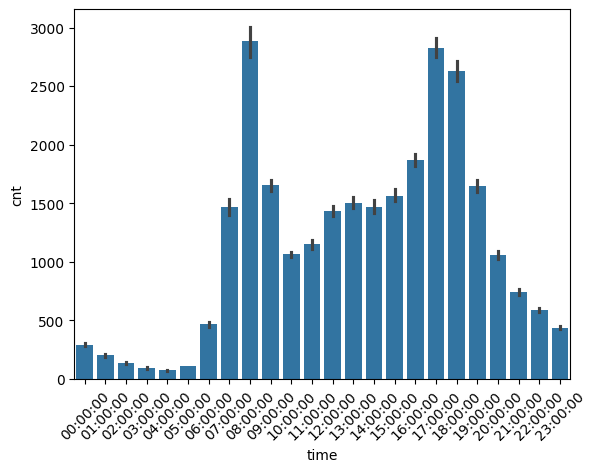

In [23]:
sns.barplot(x='time', y='cnt', data=df)
plt.xticks(rotation=45)
plt.show()

7AM is the preffered time to rent a bike

In [64]:
month_rentals = df.groupby('month')['cnt'].mean().reset_index()
month_rentals

,month,cnt
0,April,1112.953408
1,August,1463.116577
2,December,845.516173
3,February,836.279617
4,January,784.691997
5,July,1543.696151
6,June,1383.354430
7,March,921.294959
8,May,1275.099462
9,November,965.867832


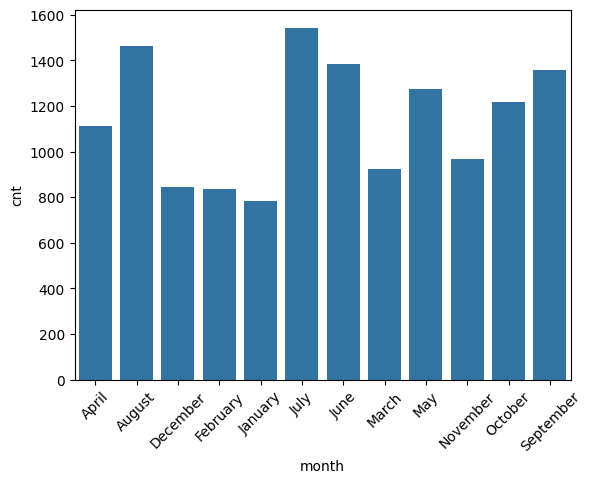

In [65]:
# Calculate the AVERAGE rentals PER HOUR per month
sns.barplot(x='month', y='cnt', data=month_rentals)
plt.xticks(rotation=45)
plt.show()

The month of July on average has the most bike rentals per hour with 1488 rentals.

In [66]:
weather = df.groupby('weather_code')['cnt'].mean().reset_index()
weather

,weather_code,cnt
0,Broken clouds,1195.124472
1,Clear,1162.088943
2,Cloudy,635.230874
3,Light Rain shower,712.966371
4,Rain with thunderstorm,583.428571
5,Scattered clouds,1496.177491
6,Snowfall,250.850000


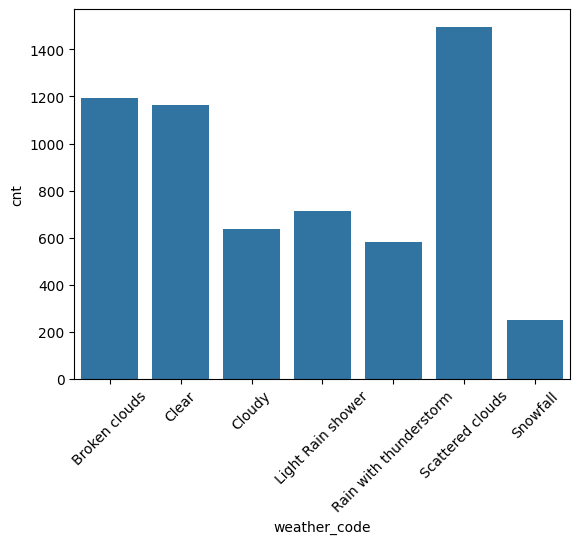

In [67]:
sns.barplot(x='weather_code', y='cnt', data=weather)
plt.xticks(rotation=45)
plt.show()

Scattered clouds is the predominant weather type under which bikes are rented on average per hour.

In [68]:
weekend = df.groupby('is_weekend')['cnt'].mean().reset_index()
weekend

,is_weekend,cnt
0,No,1209.274831
1,Yes,977.415694


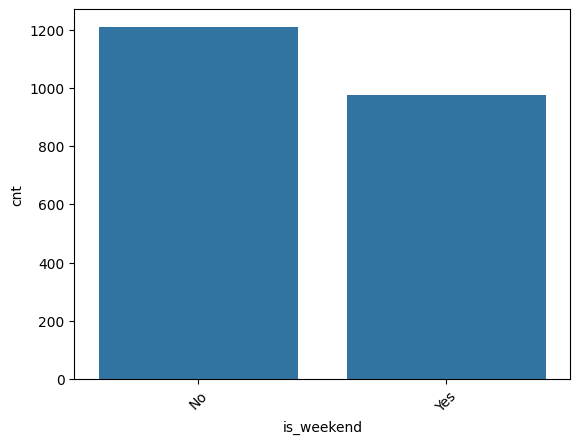

In [69]:
sns.barplot(x='is_weekend', y='cnt', data=weekend)
plt.xticks(rotation=45)
plt.show()

Bike rentals are on average more on weekdays than weekends per hour

In [70]:
holiday = df.groupby('is_holiday')['cnt'].mean().reset_index()
holiday

,is_holiday,cnt
0,No,1151.525191
1,Yes,769.526042


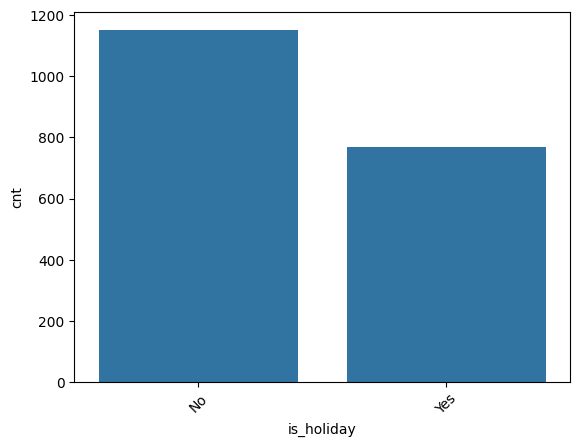

In [71]:
sns.barplot(x='is_holiday', y='cnt', data=holiday)
plt.xticks(rotation=45)
plt.show()

Bike rentals are on average more on normal days than holidays per hour.

In [77]:
# Average hourly rentals per season
season = df.groupby('season')['cnt'].mean().reset_index()
season

,season,cnt
0,Fall,1178.954218
1,Spring,1103.831589
2,Summer,1464.465238
3,Winter,821.729099


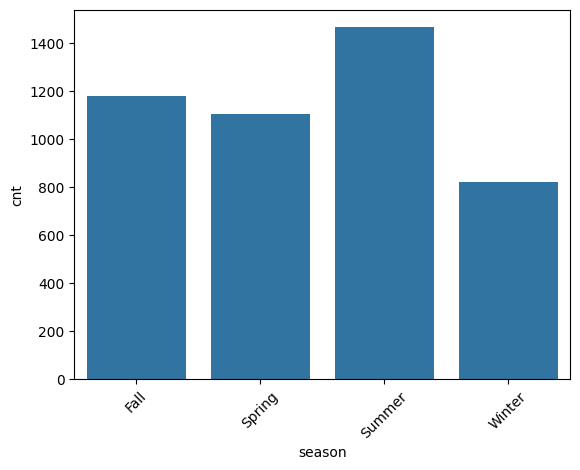

In [78]:
sns.barplot(x='season', y='cnt', data=season)
plt.xticks(rotation=45)
plt.show()

Summer has the highest average hourly rentals with 1464 rentals per hour

In [74]:
# TOTAL rentals per month
total_rentals_per_month = df.groupby('month')['cnt'].sum().reset_index()
total_rentals_per_month

,month,cnt
0,April,1600427
1,August,2171265
2,December,1254746
3,February,1136504
4,January,1166837
5,July,2286214
6,June,1967130
7,March,1352461
8,May,1897348
9,November,1381191


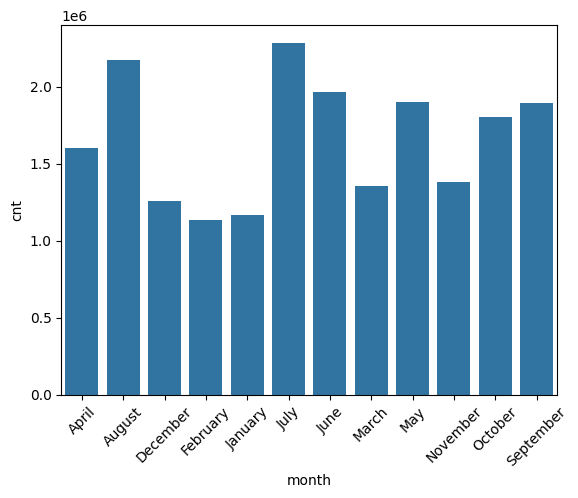

In [73]:
sns.barplot(x='month', y='cnt', data=total_rentals_per_month)
plt.xticks(rotation=45)
plt.show()

July is the month with the highest total of bike rentals with 2,286,214 rentals

### Insights

>- July is the month with the highest total of bike rentals with 2,286,214 rentals.
>- 7AM is the preffered time to rent a bike.
>- The month of July on average has the most bike rentals per hour with 1488 rentals.
>- Summer has the highest average hourly rentals with 1464 rentals per hour.
>- Bike rentals are on average more on normal days than holidays per hour.
>- Bike rentals are on average more on weekdays than weekends per hour.
>- Scattered clouds is the predominant weather type under which bikes are rented on average per hour.

### Recommendations

In [82]:
df.to_csv('london_bike_sharing.csv')